# 00. PyTorch Fundamental

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

print(torch.__version__)

2.3.0+cu121


## Introduction to Tensors

One of the most important classes.

### Creating Tensors

#### Scalar
Essentially a representantation of number in PyTorch.

In [ ]:
# Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
scalar.ndim

0

#### Converting Tensor back to Python value

In [ ]:
scalar.item()

7

### Vector

Literally a vector, it has magnitude and direction.

In [ ]:
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [ ]:
vector.shape

torch.Size([2])

### MATRIX

In [ ]:
MATRIX = torch.tensor([[7, 9],
                      [9, 10]])
MATRIX

tensor([[ 7,  9],
        [ 9, 10]])

In [ ]:
MATRIX.ndim

2

In [ ]:
MATRIX[0]

tensor([7, 9])

In [ ]:
MATRIX.shape

torch.Size([2, 2])

### TENSOR

In [ ]:
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [4, 6, 8]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [4, 6, 8]]])

In [ ]:
TENSOR.ndim

3

In [ ]:
TENSOR.shape

torch.Size([1, 3, 3])

In [ ]:
TENSOR[0]

tensor([[1, 2, 3],
        [3, 6, 9],
        [4, 6, 8]])

### Random Tensors

Why to use it?
They are important because the wat many neural networks learn is that they start with tensors full of random numbers and then adjust those random numbers to better represent the data.

`Start with random numbers -> Look at data -> Update random numbers -> Look at data -> Update random numbers`

In [ ]:
random_tensors = torch.rand(1, 3, 4)
random_tensors

tensor([[[0.7337, 0.5425, 0.6643, 0.6454],
         [0.6627, 0.7165, 0.2680, 0.6004],
         [0.7865, 0.4401, 0.9759, 0.5688]]])

In [ ]:
random_tensors.ndim

3

#### Create a random tensor with similar shape to an image tensor

In [ ]:
random_image_size_tensor = torch.rand(size=(224, 224, 3)) # Height, Width, Colour Channels
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

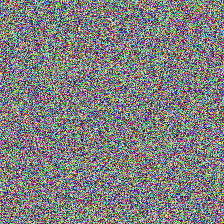

In [ ]:
Image.fromarray((random_image_size_tensor.numpy() * 255).astype(np.uint8))

#### Zeros and Ones

In [ ]:
zeros = torch.zeros(224, 224, 3)
zeros[:2]

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])

In [ ]:
(zeros * random_image_size_tensor)[:2]

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])

In [ ]:
ones = torch.ones(3, 4)
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
ones.dtype

torch.float32

#### Creating a range of tensors and tensors-like

In [ ]:
one_to_ten = torch.arange(0, 10)
one_to_ten

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
torch.arange(0, 100, 10)

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
ten_zeros = torch.zeros_like(one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor Datatypes

Three most common problems when using PyTorch and DL:
1. Tensors not right datatype
2. Tensors not right shape
3. Tensors not on the same device (CPU, GPU, TPU)

In [ ]:
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None,
                               device=None,
                               requires_grad=False)
float_32_tensor, float_32_tensor.dtype

(tensor([3., 6., 9.]), torch.float32)

#### Changing types

In [ ]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [ ]:
float_32_tensor * float_16_tensor

tensor([ 9., 36., 81.])

### Getting information from tensors

In [ ]:
float_32_tensor.dtype

torch.float32

In [ ]:
float_32_tensor.shape

torch.Size([3])

In [ ]:
float_32_tensor.device

device(type='cpu')

### Manipulating Tensors (tensor operations)

Neural networks use tensor operations to find patterns.

In [ ]:
tensor = torch.tensor([1, 2, 3])

In [ ]:
tensor + 10

tensor([11, 12, 13])

In [ ]:
tensor * 10

tensor([10, 20, 30])

In [ ]:
tensor - 10

tensor([-9, -8, -7])

In [ ]:
tensor / 10

tensor([0.1000, 0.2000, 0.3000])

#### Matrix multiplication

1. Element-wise
2. Matrix multiplication (Most common to find in neural networks)
    - Inner dimensions must match
    - Resulting shape will have the shape of the outer dimensions

In [ ]:
tensor = torch.tensor([1, 2, 3])

In [ ]:
tensor * tensor

tensor([1, 4, 9])

In [ ]:
torch.matmul(tensor, tensor)

tensor(14)

In [ ]:
tensor2 = torch.tensor([[1, 2, 3],
                        [2, 4, 6]])

In [ ]:
torch.matmul(tensor2, tensor)

tensor([14, 28])

### Dealing with shape errors

In [ ]:
tensor_A = torch.tensor([[1, 2],
                         [3, 6],
                         [7, 8]])

tensor_B = torch.tensor([[3, 5],
                         [9, 10],
                         [11, 18]])

In [ ]:
# Same as torch.matmul
torch.mm(tensor_A, tensor_B)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [ ]:
tensor_A.shape, tensor_B.shape

(torch.Size([3, 2]), torch.Size([3, 2]))

#### Transposing

It switches the axis.

In [ ]:
tensor_B.T

tensor([[ 3,  9, 11],
        [ 5, 10, 18]])

In [ ]:
torch.mm(tensor_A.T, tensor_B)

tensor([[107, 161],
        [148, 214]])

In [ ]:
torch.mm(tensor_A, tensor_B.T)

tensor([[ 13,  29,  47],
        [ 39,  87, 141],
        [ 61, 143, 221]])

In [ ]:
torch.mm(tensor_B.T, tensor_A)

tensor([[107, 148],
        [161, 214]])

In [ ]:
torch.mm(tensor_B, tensor_A.T)

tensor([[ 13,  39,  61],
        [ 29,  87, 143],
        [ 47, 141, 221]])

### Finding the min, max, mean, sum, etc (tensor aggregation)

It has this name because we are going from a set of number to a single one.

In [ ]:
x = torch.arange(0, 1000, 1)

#### Min

In [ ]:
torch.min(x), x.min()

(tensor(0), tensor(0))

#### Max

In [ ]:
torch.max(x), x.max()

(tensor(999), tensor(999))

#### Sum

In [ ]:
torch.sum(x), x.sum()

(tensor(499500), tensor(499500))

#### Mean

In [ ]:
# This requires to specify the dtype when working with float
torch.mean(x, dtype=torch.float32), x.mean(dtype=torch.float32)

(tensor(499.5000), tensor(499.5000))

### Finding the positional min and max

In [ ]:
x = torch.randperm(x.size(0))

#### Argmax

In [ ]:
torch.argmax(x), x.argmax(), x[694]

(tensor(759), tensor(759), tensor(512))

#### Argmin

In [ ]:
torch.argmin(x), x.argmin(), x[110]

(tensor(806), tensor(806), tensor(786))

### Reshaping, stacking, squeezing and unsqueezing tensors

* Reshaping - Reshapes the input tensor to a defined shape.
* View - Return a vire of a defined shape (shares the same memory space as the original tensor).
* Stacking - Combine multiple tensors on top of each other.
* Squeeze - Removes all `1` dimensions from a tensor.
* Unsqueeze - Adds `1` dimension to a tensor.
* Permute - Return a view of the input with dimensions permuted.

#### Reshaping

In order to be able to reshape a tensor, the number of elements in the reshaped tensor must be the same as in the original tensor.

In [ ]:
x = torch.arange(1., 11.)

x, x.shape

(tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), torch.Size([10]))

In [ ]:
x_reshaped = x.reshape(2, 5)
x_reshaped, x_reshaped.shape

(tensor([[ 1.,  2.,  3.,  4.,  5.],
         [ 6.,  7.,  8.,  9., 10.]]),
 torch.Size([2, 5]))

#### View

In [ ]:
z = x.view(2, 5)
z, z.shape

(tensor([[ 1.,  2.,  3.,  4.,  5.],
         [ 6.,  7.,  8.,  9., 10.]]),
 torch.Size([2, 5]))

In [ ]:
# Shared memory example
z[:, 0] = 5
z, x

(tensor([[ 5.,  2.,  3.,  4.,  5.],
         [ 5.,  7.,  8.,  9., 10.]]),
 tensor([ 5.,  2.,  3.,  4.,  5.,  5.,  7.,  8.,  9., 10.]))

#### Stack

In [ ]:
x_stacked = torch.stack([x, x, x, x], dim=1)
x_stacked, x_stacked.shape

(tensor([[ 5.,  5.,  5.,  5.],
         [ 2.,  2.,  2.,  2.],
         [ 3.,  3.,  3.,  3.],
         [ 4.,  4.,  4.,  4.],
         [ 5.,  5.,  5.,  5.],
         [ 5.,  5.,  5.,  5.],
         [ 7.,  7.,  7.,  7.],
         [ 8.,  8.,  8.,  8.],
         [ 9.,  9.,  9.,  9.],
         [10., 10., 10., 10.]]),
 torch.Size([10, 4]))

#### Squeeze

Removes a single dimension from a target tensor.

In [ ]:
x_squeeze = (torch.arange(1., 9.)).reshape(1, 8)

x_squeeze, x_squeeze.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8.]]), torch.Size([1, 8]))

In [ ]:
x_squeeze = torch.squeeze(x_squeeze)
x_squeeze, x_squeeze.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8.]), torch.Size([8]))

### Unsqueeze

Adds a single dimension to a target tensor.

In [ ]:
x_unqueezed = torch.arange(1, 9).reshape(1, 8)
x_unqueezed, x_unqueezed.shape

(tensor([[1, 2, 3, 4, 5, 6, 7, 8]]), torch.Size([1, 8]))

In [ ]:
x_unqueezed = x_unqueezed.unsqueeze(dim=1)
x_unqueezed, x_unqueezed.shape

(tensor([[[1, 2, 3, 4, 5, 6, 7, 8]]]), torch.Size([1, 1, 8]))

### Permute

Rearranges the dimensions of a target tensor in a specified order. \
Commonly used with imgs. \
**Param:** Index of each dimension in the original tensor.

In [ ]:
x_permuted = torch.rand(224, 224, 3)
x_permuted.shape

torch.Size([224, 224, 3])

In [ ]:
x_permuted = x_permuted.permute(2, 0, 1)
x_permuted.shape

torch.Size([3, 224, 224])

### Indexing

In [ ]:
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

#### First bracket (dim=0)

In [ ]:
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

#### Middle bracket (dim=1)

In [ ]:
x[0][0]

tensor([1, 2, 3])

In [ ]:
x[0, 0]

tensor([1, 2, 3])

#### The most inner bracket (dim=2)

In [ ]:
x[0][0][0]

tensor(1)

In [ ]:
x[0, 0, 0]

tensor(1)

#### Mini challenge

In [ ]:
x[0, 2, 2]

tensor(9)

#### Use of the ":"

It's used to select "all" of a target dimension.

In [ ]:
x[0, :, 0] # All elements at position 0 in the second dimension.

tensor([1, 4, 7])

In [ ]:
x[:, :, 2]

tensor([[3, 6, 9]])

In [ ]:
x[0, 0, :]

tensor([1, 2, 3])

### PyTorch tensors & NumPy

* np -> tensor -> `torch.from_numpy(array)`
* tensor -> np -> `torch.Tensor.numpy()` \

**OBS**: Default types for each library are differents.


In [ ]:
array = np.arange(1, 8)
tensor = torch.from_numpy(array)
tensor

tensor([1, 2, 3, 4, 5, 6, 7])

In [ ]:
tensor = torch.arange(1, 8)
np_array = tensor.numpy()
np_array

array([1, 2, 3, 4, 5, 6, 7])

Changing value of an array doesn't change the tensor, the same the other way around. They don't share memory.

In [ ]:
array += 1
array, tensor

(array([2, 3, 4, 5, 6, 7, 8]), tensor([1, 2, 3, 4, 5, 6, 7]))

In [ ]:
tensor -= 1
array, tensor

(array([2, 3, 4, 5, 6, 7, 8]), tensor([0, 1, 2, 3, 4, 5, 6]))

### Reproducibility

In [ ]:
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.5638, 0.9684, 0.0072, 0.1224],
        [0.5040, 0.7664, 0.3543, 0.6206],
        [0.9387, 0.4876, 0.2566, 0.7364]])
tensor([[0.3839, 0.9706, 0.2808, 0.4415],
        [0.3676, 0.3613, 0.6906, 0.0570],
        [0.6163, 0.1549, 0.9678, 0.2927]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


### Reducing randomness (random seed)

In [ ]:
RANDOM_SEED = 42

torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3, 4)

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


### Running tensors and PyTorch objects on the GPUs

In [ ]:
torch.cuda.is_available()

False

#### Setup device agnostic code

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

#### Count number of devices (GPUs)

In [ ]:
torch.cuda.device_count()

0

#### Tensors to GPU

In [ ]:
tensor = torch.tensor([1, 2, 3]).to(device)

tensor, tensor.device

(tensor([1, 2, 3]), device(type='cpu'))

#### CPU to Tensors

Notice when moving Tensors in GPU to NumPy in CPU, we will have a conversion error.

In [ ]:
tensor_back_on_cpu = tensor.cpu().numpy
tensor_back_on_cpu

<function Tensor.numpy>